In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

# Data Preparation

In [5]:
#load the csv file
df=pd.read_csv(r"C:\Users\abhin\Downloads\bank+marketing\bank\bank.csv")

In [6]:
#display first five rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#display last five rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
#(row_no,col_no)
df.shape

(4521, 17)

In [9]:
#display column name
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
#display mean,count and other statistical data of columns containing numeric values
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
#displays the data type and null count of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
#checks if any column has null value
pd.isnull(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#returns count of null values in a column
pd.isnull(df).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

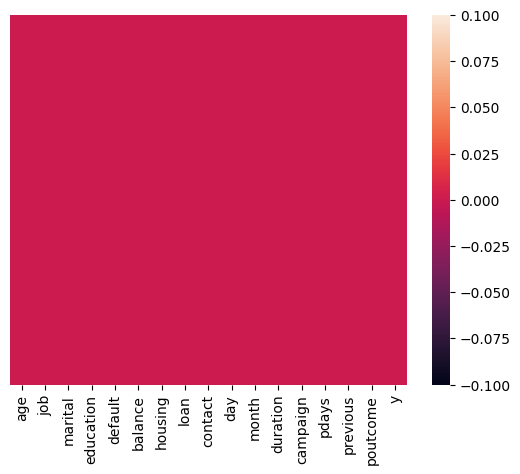

In [14]:
# visual representation of missing values in dataframe
# Uniform colour observed meaning there are no missing values
sns.heatmap(df.isnull(),yticklabels=False) 

In [15]:
duplicates=df[df.duplicated()] #checking for duplicate values
duplicates

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [16]:
datatypes=df.dtypes #checking if data type matches for each column
datatypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
negative_balance=df[df['balance']<0] #checking for negative average annual balance
negative_balance

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
48,32,entrepreneur,single,primary,yes,-849,yes,yes,cellular,4,feb,204,1,-1,0,unknown,no
60,41,blue-collar,married,primary,no,-516,no,yes,telephone,8,jul,554,3,-1,0,unknown,no
92,27,services,single,secondary,no,-195,yes,no,cellular,18,may,391,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,44,blue-collar,married,primary,no,-237,yes,no,telephone,10,jul,73,1,-1,0,unknown,no
4502,42,services,married,secondary,no,-91,yes,yes,cellular,5,feb,43,1,-1,0,unknown,no
4506,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no


In [18]:
df=df.drop(negative_balance.index) #removing -ve balance

In [19]:
print(df[df['balance']<0]) #negative balance rows removed

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000
mean,41.297232,1577.000963,15.872202,263.861372,2.802888,40.693141,0.556919
std,10.694177,3090.416228,8.195098,260.473877,3.114009,101.093461,1.704965
min,19.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,141.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,16.000000,186.000000,2.000000,-1.000000,0.000000
75%,49.000000,1637.000000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [21]:
#checking and removing outliers using interquantile range (IQR) method 

In [22]:
#balance values ranges from 0 to 711888, clearly there are some outliers present here
min,max=df.balance.quantile([0.001,0.999])
min,max

(0.0, 27052.984000000048)

In [23]:
bal_outliers=df[df['balance']>max] #checking for balance>max rows
bal_outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no


In [24]:
df=df.drop(bal_outliers.index) #removing balance outliers
df[df['balance']>max] #balance outliers removed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [25]:
#checking outliers in duration
min,max=df.duration.quantile([0.001,0.999])
min,max

(5.0, 1990.573000000013)

In [26]:
dur_out=df[df['duration']>max] #printing duration>max rows
dur_out

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no
980,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes
2875,29,technician,single,secondary,no,778,yes,no,unknown,6,jun,1994,2,-1,0,unknown,no
3673,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes
4123,47,blue-collar,divorced,primary,no,126,yes,no,unknown,3,jun,2456,2,-1,0,unknown,yes


In [27]:
df=df.drop(dur_out.index) #removing duration outliers
df[df['duration']>max]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [28]:
#checking outliers in pdays
min,max=df.pdays.quantile([0.001,0.999])
min,max

(-1.0, 686.4240000000027)

In [ ]:
#max value in pdays (871) not much greater than max value of IQR, therefore no outliers

In [30]:
#checking if dataset contains inavlid month name or format
month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'] 
m_out = df[~df['month'].isin(month)]
m_out

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4145 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4145 non-null   int64 
 1   job        4145 non-null   object
 2   marital    4145 non-null   object
 3   education  4145 non-null   object
 4   default    4145 non-null   object
 5   balance    4145 non-null   int64 
 6   housing    4145 non-null   object
 7   loan       4145 non-null   object
 8   contact    4145 non-null   object
 9   day        4145 non-null   int64 
 10  month      4145 non-null   object
 11  duration   4145 non-null   int64 
 12  campaign   4145 non-null   int64 
 13  pdays      4145 non-null   int64 
 14  previous   4145 non-null   int64 
 15  poutcome   4145 non-null   object
 16  y          4145 non-null   object
dtypes: int64(7), object(10)
memory usage: 582.9+ KB


In [32]:
#Rename column 'job' as 'Job Status' and 'marital' as 'Marital Status'
df=df.rename(columns={'job':'Job Status','marital':'Marital Status'})

In [33]:
df

,age,Job Status,Marital Status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [34]:
#Handling categorical values
categorical_columns = ['Job Status', 'Marital Status', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,Job Status_admin.,Job Status_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,False,False,...,False,False,False,False,True,False,False,False,False,True
1,33,4789,11,220,1,339,4,no,False,False,...,False,False,True,False,False,False,True,False,False,False
2,35,1350,16,185,1,330,1,no,False,False,...,False,False,False,False,False,False,True,False,False,False
3,30,1476,3,199,4,-1,0,no,False,False,...,True,False,False,False,False,False,False,False,False,True
4,59,0,5,226,1,-1,0,no,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,1205,20,45,4,153,1,no,False,True,...,False,False,False,False,False,False,True,False,False,False
4515,32,473,7,624,5,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,False,True
4518,57,295,19,151,11,-1,0,no,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,28,1137,6,129,4,211,3,no,False,True,...,False,False,False,False,False,False,False,True,False,False


In [35]:
#Splitting Data into Training and Testing Sets
feature_columns = ['age', 'Job Status', 'Marital Status', 'education', 'default',
                   'balance', 'housing', 'loan', 'contact', 'day', 'month',
                   'duration', 'campaign', 'pdays', 'previous', 'poutcome']
X = df[feature_columns]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% used for testing, 80% for training
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3316, 16)
X_test shape: (829, 16)
y_train shape: (3316,)
y_test shape: (829,)


# Data Exploration

In [36]:
df.columns

Index(['age', 'Job Status', 'Marital Status', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,41.287817,1532.616647,15.885645,261.325452,2.803136,40.793727,0.558263
std,10.694034,2742.770998,8.189771,248.899035,3.116750,101.194589,1.706801
min,19.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,141.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,541.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1628.000000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,87.000000,26965.000000,31.000000,1971.000000,50.000000,871.000000,25.000000


In [38]:
#Displaying unique values in each column
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Job Status
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Marital Status
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [39]:
#printing no of unique values in each column
for column in df.columns:
    print(column,df[column].nunique())

age 67
Job Status 12
Marital Status 3
education 4
default 2
balance 2073
housing 2
loan 2
contact 3
day 31
month 12
duration 847
campaign 31
pdays 288
previous 23
poutcome 4
y 2


In [40]:
df.dtypes

age                int64
Job Status        object
Marital Status    object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month             object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
y                 object
dtype: object

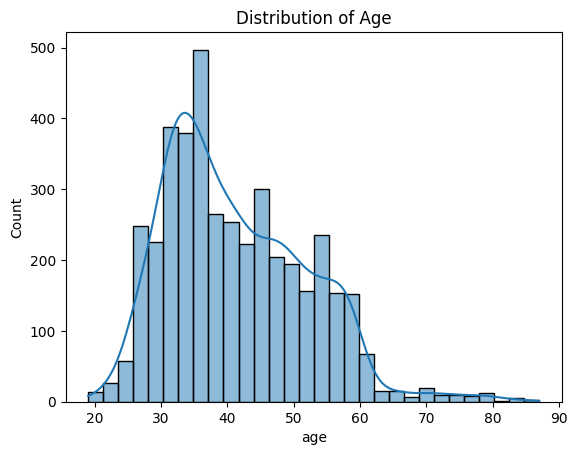

In [41]:
#Distribution of age
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

In [42]:
#list all column names having dtype as object
category=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
category

['Job Status',
 'Marital Status',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\1558135443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature,data=df,palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\1558135443.py:7: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=feature,data=df,palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\1558135443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature,data=df,palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\1558135443.py:7: UserWarning: The palette list has more values (9) than needed (3), which may not be intended

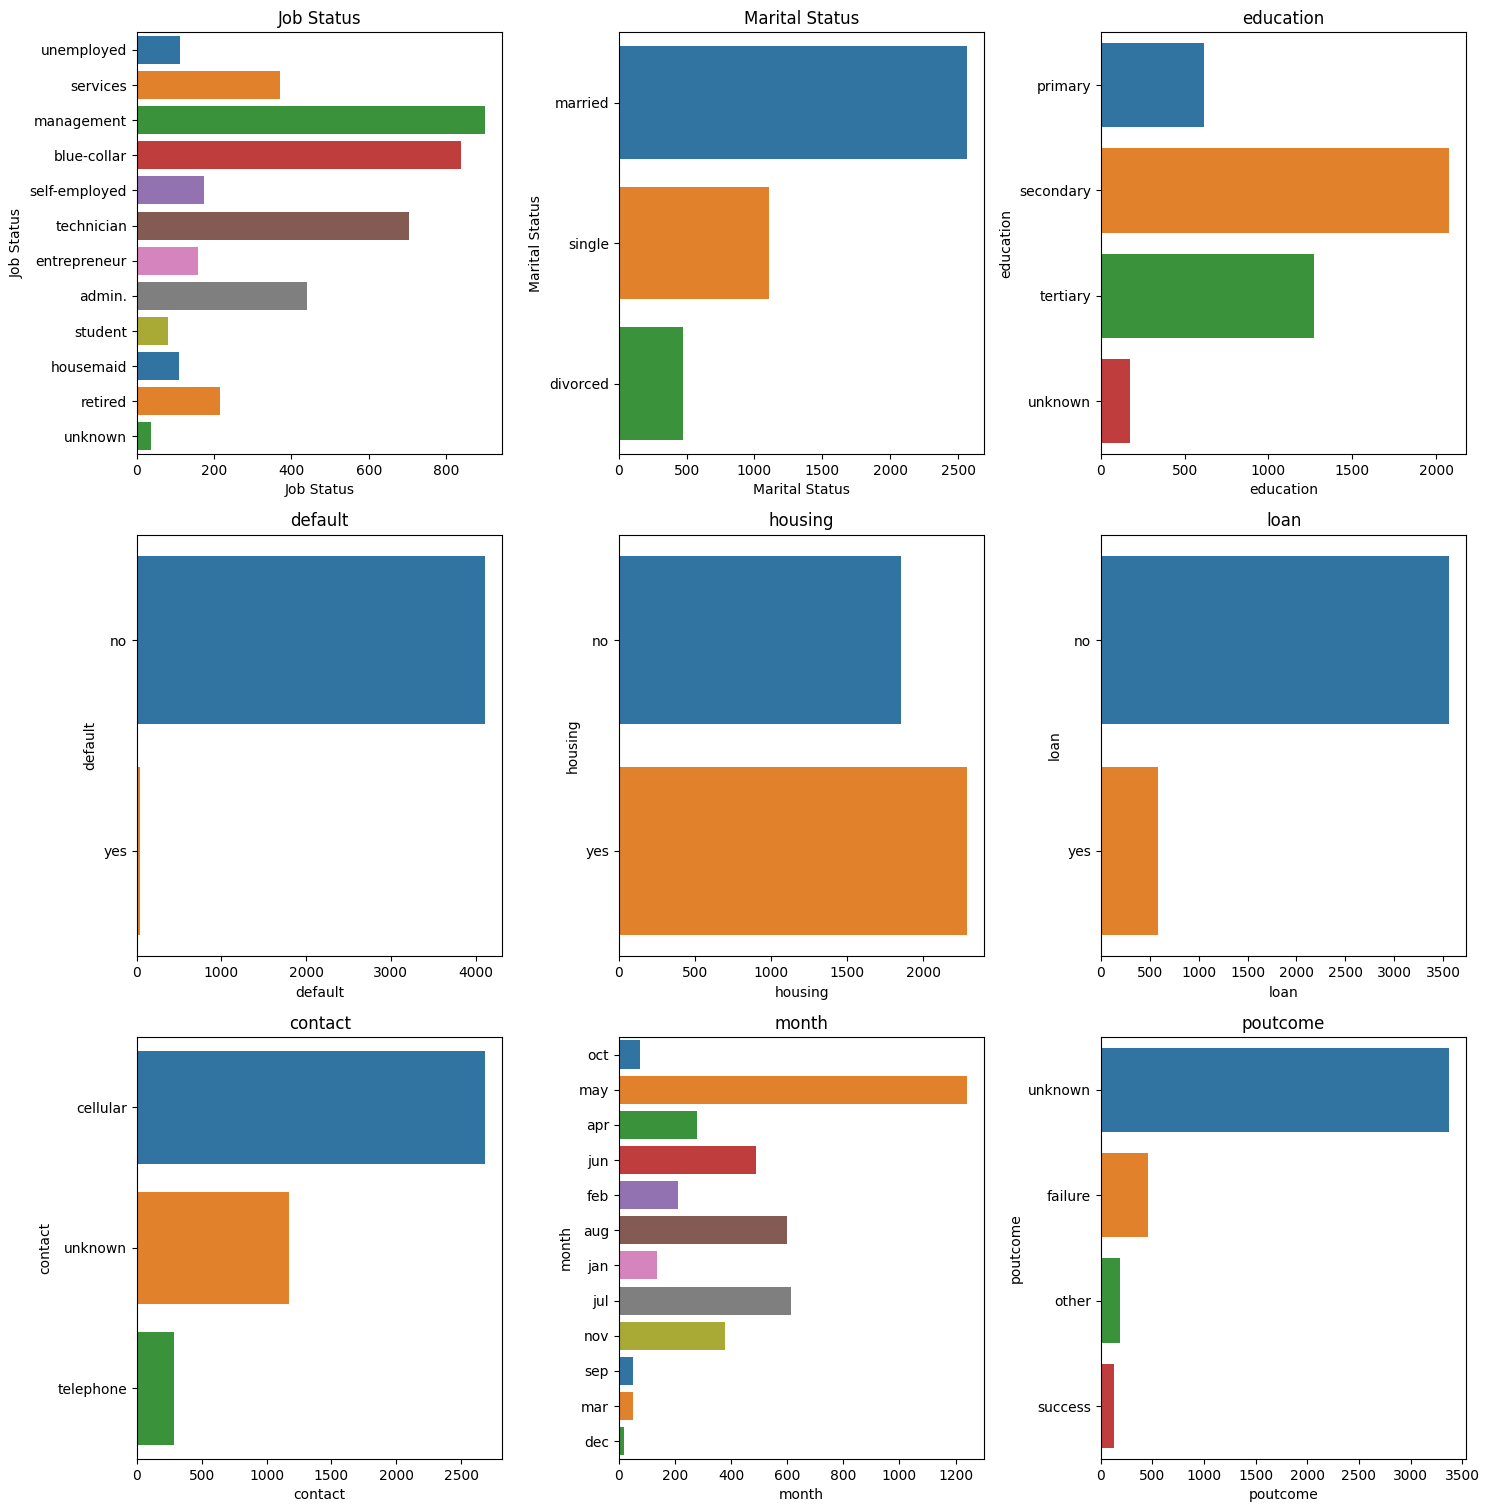

In [43]:
#plot a graph for all object subtype columns
plt.figure(figsize=(15,60))
plotnumber=1
colors = sns.color_palette("tab10", n_colors=len(category))
for feature in category:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=df,palette=colors)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

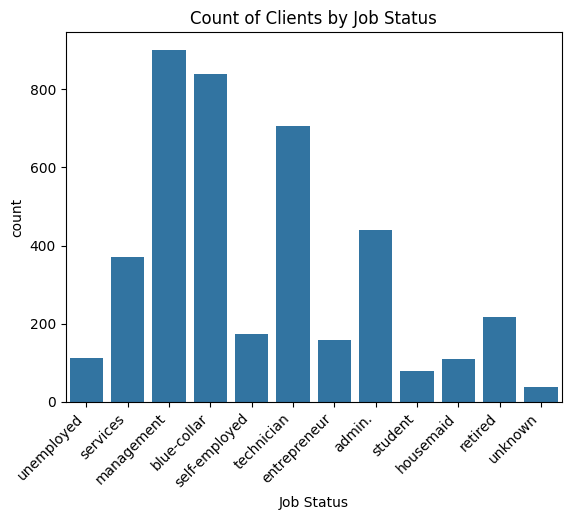

In [44]:
#Count plot for Job Status
sns.countplot(x='Job Status', data=df)
plt.title('Count of Clients by Job Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

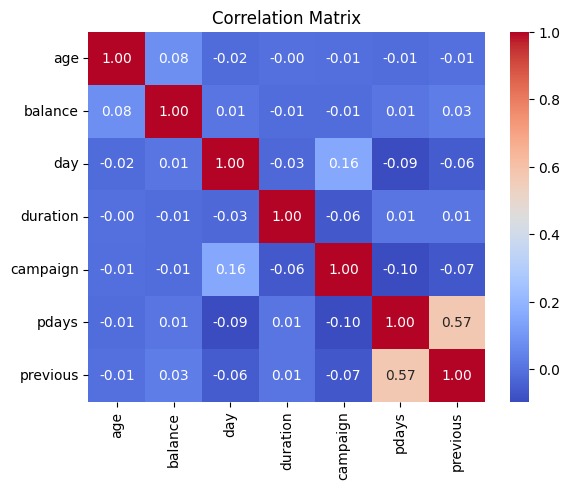

In [45]:
#Provide correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

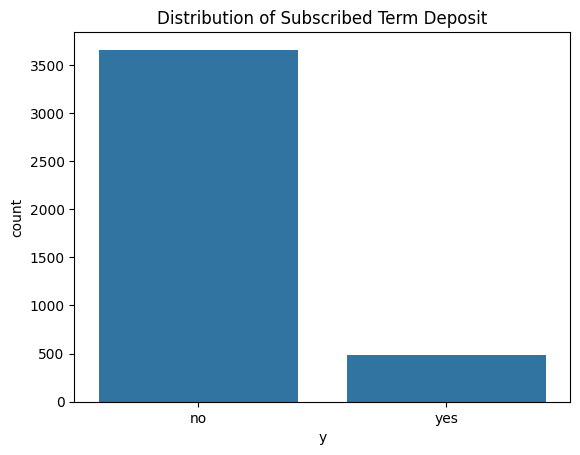

In [46]:
#Distribution of 'y' 
sns.countplot(x='y', data=df)
plt.title('Distribution of Subscribed Term Deposit')
plt.show()

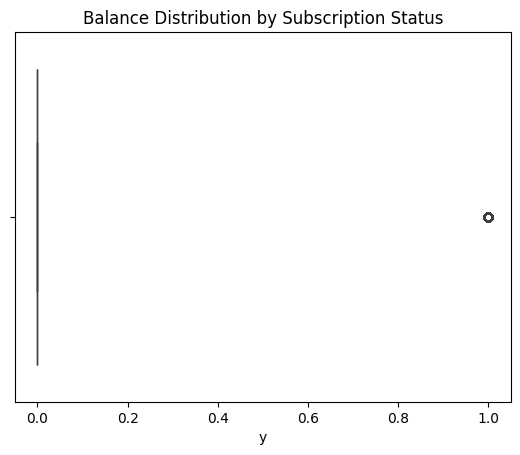

In [66]:
#Relation of other features to 'y'
sns.boxplot(x='y', data=df)
plt.title('Balance Distribution by Subscription Status')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\2101629226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\2101629226.py:7: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.boxplot(x=df[feature], palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\2101629226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette=colors)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3464\2101629226.py:7: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.boxplot(x=df[feature], palette=colors)
C:

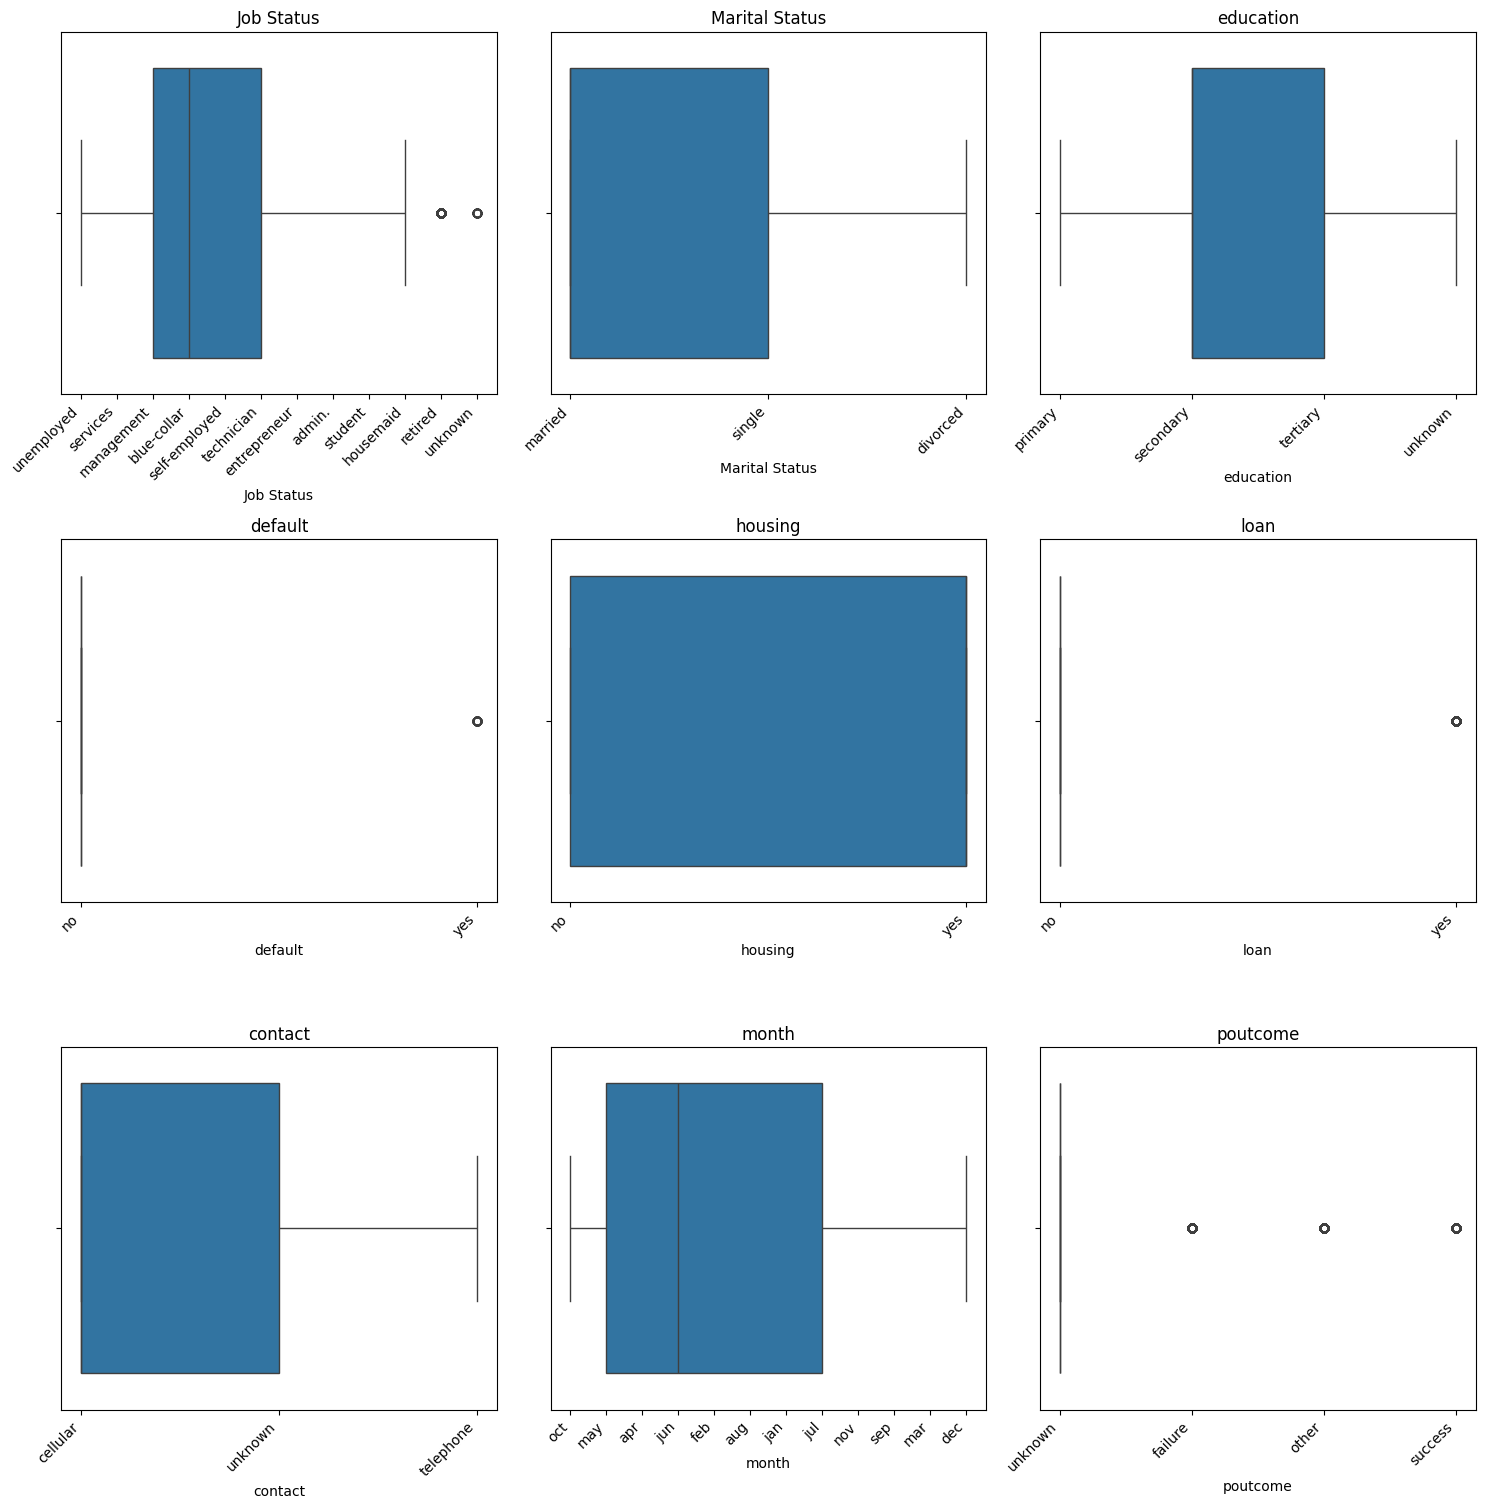

In [65]:
plt.figure(figsize=(15, 60))
plotnumber = 1
colors = sns.color_palette("tab10", n_colors=len(category))

for feature in category:
    plt.subplot(12, 3, plotnumber)
    sns.boxplot(x=df[feature], palette=colors)
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=45, ha='right')
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Modelling

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
df = pd.read_csv("C:\\Users\\abhin\\Downloads\\bank+marketing\\bank\\bank.csv")
df=df.rename(columns={'job':'Job Status','marital':'Marital Status'})

In [51]:
categorical_cols = ['Job Status', 'Marital Status', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [52]:
# Setting up transformers for preprocessing for both numerical and categorical values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
#Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [54]:
#Encode the target variable 'y'
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [55]:
# Train-Test Split
X = df.drop('y', axis=1)
y = df['y']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
#Model training(Using Logistic Regression)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())]) #Creating a pipeline consisting of a preprocessor and logistic regression classifier

model.fit(X_train, y_train) #Fits the model using training data
y_pred = model.predict(X_test) #Make predictions on test data
print(f'Accuracy: {accuracy_score(y_test, y_pred)}') #Returns accuracy of model
print(classification_report(y_test, y_pred)) #Returns classification report

Accuracy: 0.9049723756906077
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       793
           1       0.69      0.42      0.52       112

    accuracy                           0.90       905
   macro avg       0.81      0.70      0.73       905
weighted avg       0.89      0.90      0.89       905



In [57]:
# Creating a pipeline
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier())])

# Hyperparameter tuning with Grid Search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

#Grid Search
grid_search = GridSearchCV(model_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train) # Triggers the grid search process
# model is trained and evaluated with different hyperparameter combinations.

best_model = grid_search.best_estimator_ # best model created

# Making predictions on test data using best model
y_pred_rf = best_model.predict(X_test)

# Calculates performance of the Random Forest model on test set
print("Random Forest:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))

# Obtaining the names of the features after one-hot encoding
if 'get_feature_names' in dir(best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']):
    feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_cols)
else:
    feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Return the feature importances
feature_names = list(feature_names) + numeric_cols
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': best_model.named_steps['classifier'].feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sorts data in descending order of feature importances
print(importance_df)


Random Forest:
Accuracy: 0.9049723756906077
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       793
           1       0.76      0.34      0.47       112

    accuracy                           0.90       905
   macro avg       0.84      0.66      0.71       905
weighted avg       0.89      0.90      0.89       905

                     Feature  Importance
3       Job Status_housemaid    0.252701
0          Job Status_admin.    0.089832
1     Job Status_blue-collar    0.083896
2    Job Status_entrepreneur    0.078841
5         Job Status_retired    0.042486
49                     pdays    0.041633
4      Job Status_management    0.039871
6   Job Status_self-employed    0.025325
45                   balance    0.015738
20               default_yes    0.014078
24                  loan_yes    0.014070
28                 month_apr    0.013555
35                 month_mar    0.012374
23                   loan_no    0.012170
36            

Confusion Matrix:
[[781  12]
 [ 74  38]]


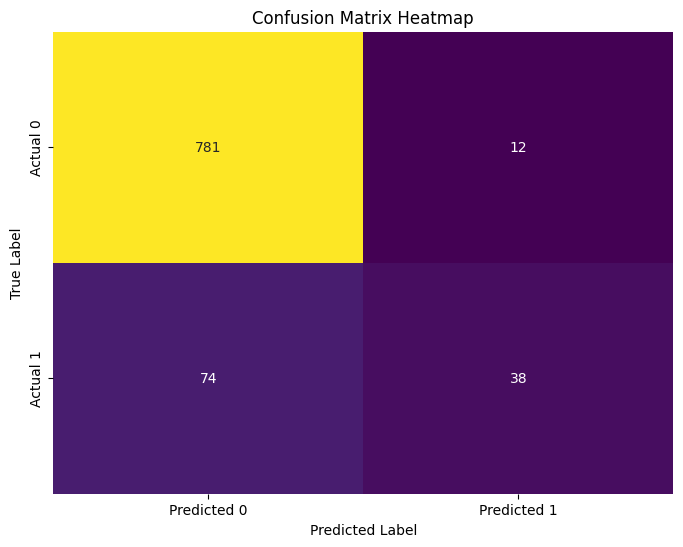

In [58]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_rf = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Represent confusion matrix in form of heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [59]:
# Create a pipeline with preprocessing and the model (XGBClassifier)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [60]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8983425414364641
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       793
           1       0.64      0.42      0.51       112

    accuracy                           0.90       905
   macro avg       0.78      0.69      0.72       905
weighted avg       0.89      0.90      0.89       905



In [61]:
# Feature importances for XGBClassifier
headers = ["name", "score"]
values = sorted(zip(X_train.columns, pipeline.named_steps['classifier'].feature_importances_), key=lambda x: x[1] * -1) # zips feature names and corresponding importances
#sorts them in descending order
feature_importances = pd.DataFrame(values, columns=headers)


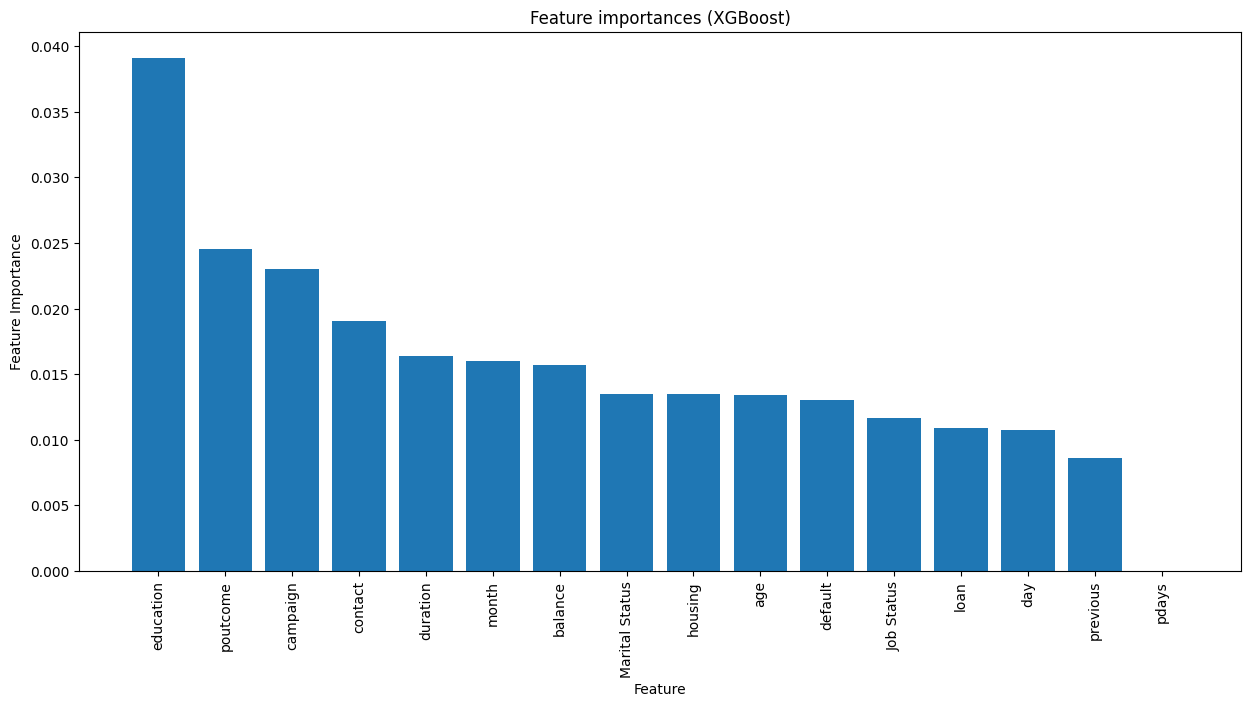

In [62]:
# Visualizes feature importance in a bar plot
fig = plt.figure(figsize=(15, 7))
x_pos = np.arange(0, len(feature_importances))
plt.bar(x_pos, feature_importances['score']) # Y-axis defined for feature importances
plt.xticks(x_pos, feature_importances['name']) # X-axis defined for features
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature importances (XGBoost)')
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[766  27]
 [ 65  47]]


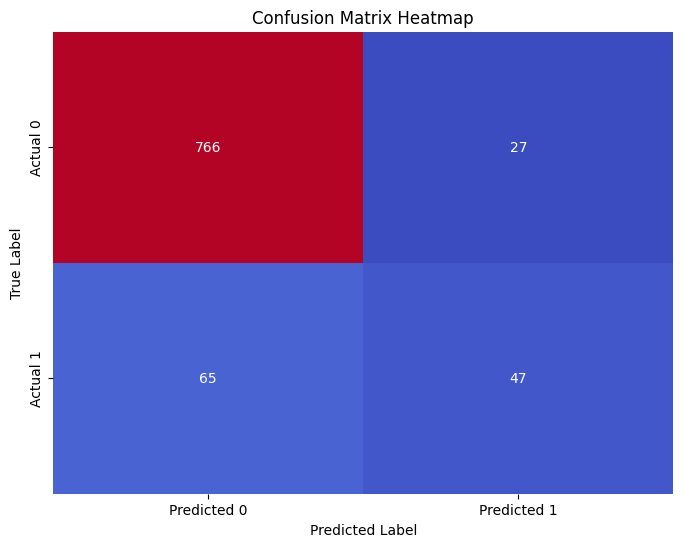

In [64]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm',cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()